In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sns.set_style("whitegrid")

In [45]:
file_path = r"C:\Users\tusha\Documents\My Project\Superstore Dataset.csv"
output_file = "Superstore_Dashboard.xlsx"  

In [46]:
def autofit_columns(worksheet, df):
    """Autofit columns for a given worksheet and dataframe."""
    for idx, col in enumerate(df):
        series = df[col]
        max_len = max((
            series.astype(str).map(len).max(),
            len(str(series.name))
        )) + 2
        worksheet.set_column(idx, idx, max_len)

try:
    df = pd.read_csv(file_path, encoding='ISO-8859-1')
    print(f"Successfully loaded data from {file_path}")
    print(f"Initial data shape: {df.shape}")
except FileNotFoundError:
    print(f"Error: The file was not found at {file_path}")
    print("Please check the file path and try again.")
    sys.exit()
except Exception as e:
    print(f"An error occurred while loading the file: {e}")
    sys.exit()

Successfully loaded data from C:\Users\tusha\Documents\My Project\Superstore Dataset.csv
Initial data shape: (9994, 21)


In [47]:
# --- Data Cleaning ---
print("\n--- Data Cleaning ---")
duplicate_count = df.duplicated().sum()
print(f"Total duplicate rows found: {duplicate_count}")

if duplicate_count > 0:
    df = df.drop_duplicates()
    print(f"Dropped {duplicate_count} duplicate rows.")
    print(f"New data shape: {df.shape}")
else:
    print("No duplicate rows to drop.")

try:
    df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y')
    df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%m/%d/%Y')
    print("\nConverted 'Order Date' and 'Ship Date' to datetime objects.")
except Exception as e:
    print(f"Error converting date columns: {e}")

num_rows = len(df)
print(f"Total rows after cleaning: {num_rows}")


--- Data Cleaning ---
Total duplicate rows found: 0
No duplicate rows to drop.

Converted 'Order Date' and 'Ship Date' to datetime objects.
Total rows after cleaning: 9994


In [48]:
# --- Pre-calculate ---

total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()

overall_profit_margin = (total_profit / total_sales) * 100 if total_sales != 0 else 0

average_discount_percent = df['Discount'].mean() * 100  
average_discount_decimal = df['Discount'].mean() 

print(f"Total Sales: ${total_sales:,.2f}")
print(f"Total Profit: ${total_profit:,.2f}")
print(f"Overall Profit Margin: {overall_profit_margin:.2f}%")
print(f"Average Discount: {average_discount_percent:.2f}%")

print("\n--- Descriptive Statistics (Numerical Columns) ---")
print(df[['Sales', 'Profit', 'Discount', 'Quantity']].describe())

print("\nPreparing data for charts...")
region_sales = df.groupby('Region')['Sales'].sum().reset_index().sort_values(by='Sales', ascending=False)
category_profit = df.groupby('Category')['Profit'].sum().reset_index().sort_values(by='Profit', ascending=False)
monthly_sales = df.set_index('Order Date')['Sales'].resample('MS').sum().reset_index()
print("Data preparation complete.")

Total Sales: $2,297,200.86
Total Profit: $286,397.02
Overall Profit Margin: 12.47%
Average Discount: 15.62%

--- Descriptive Statistics (Numerical Columns) ---
              Sales       Profit     Discount     Quantity
count   9994.000000  9994.000000  9994.000000  9994.000000
mean     229.858001    28.656896     0.156203     3.789574
std      623.245101   234.260108     0.206452     2.225110
min        0.444000 -6599.978000     0.000000     1.000000
25%       17.280000     1.728750     0.000000     2.000000
50%       54.490000     8.666500     0.200000     3.000000
75%      209.940000    29.364000     0.200000     5.000000
max    22638.480000  8399.976000     0.800000    14.000000

Preparing data for charts...
Data preparation complete.


Generated sales_by_region.png


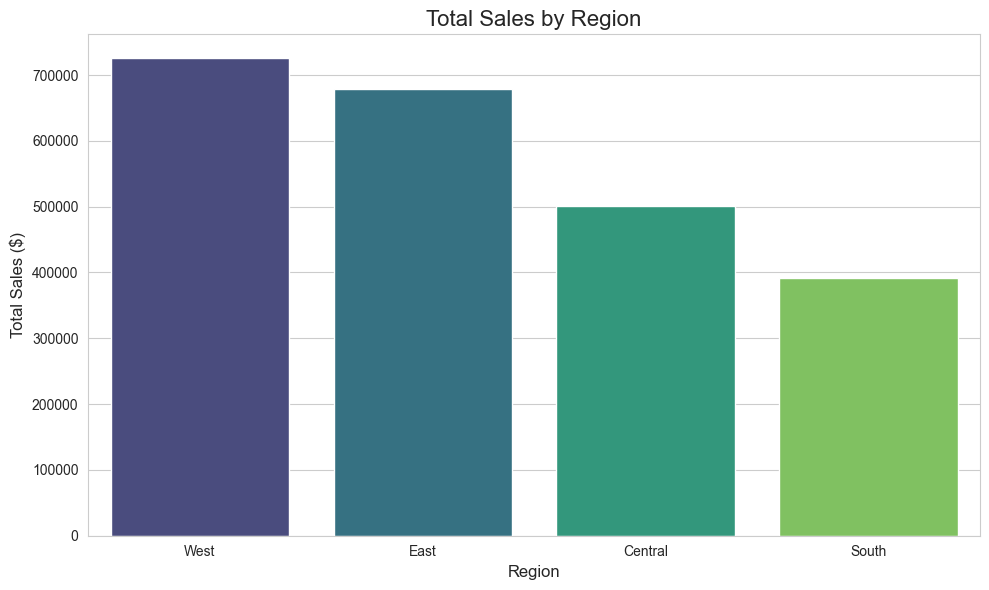

In [49]:
# --- View Bar Plot - Sales By region ---
plt.figure(figsize=(10, 6))
sns.barplot(data=region_sales, x='Region', y='Sales', palette='viridis', hue='Region', legend=False)
plt.title('Total Sales by Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.ticklabel_format(style='plain', axis='y')  
plt.tight_layout()
plt.savefig('sales_by_region.png')
print("Generated sales_by_region.png")

Generated profit_by_category.png


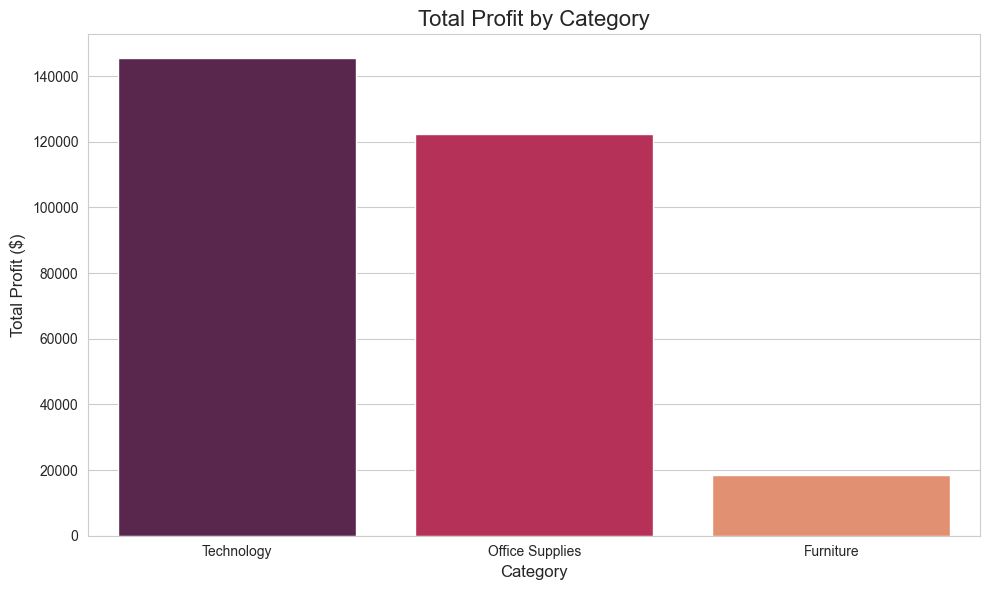

In [50]:
# --- View Bar Plot - Profit by Category ---
plt.figure(figsize=(10, 6))
sns.barplot(data=category_profit, x='Category', y='Profit', palette='rocket', hue='Category', legend=False)
plt.title('Total Profit by Category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Total Profit ($)', fontsize=12)
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.savefig('profit_by_category.png')
print("Generated profit_by_category.png")

Generated profit_vs_discount.png


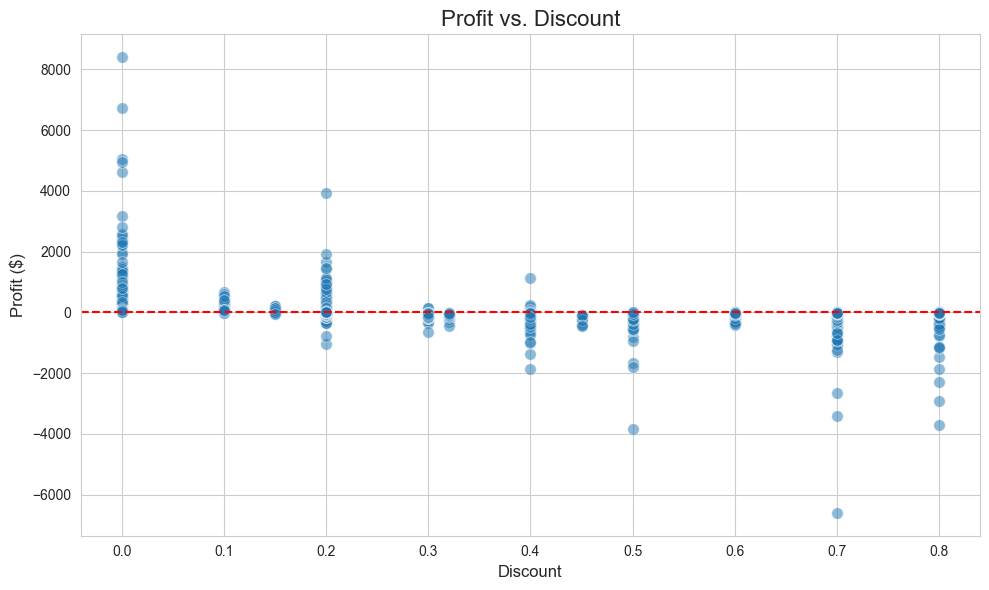

In [51]:
# --- View Scatter Plot - Profit Vs. Discount ---
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Discount', y='Profit', alpha=0.5, s=70)
plt.title('Profit vs. Discount', fontsize=16)
plt.xlabel('Discount', fontsize=12)
plt.ylabel('Profit ($)', fontsize=12)
plt.axhline(0, color='red', linestyle='--', linewidth=1.5)  
plt.tight_layout()
plt.savefig('profit_vs_discount.png')
print("Generated profit_vs_discount.png")

Generated monthly_sales_trend.png


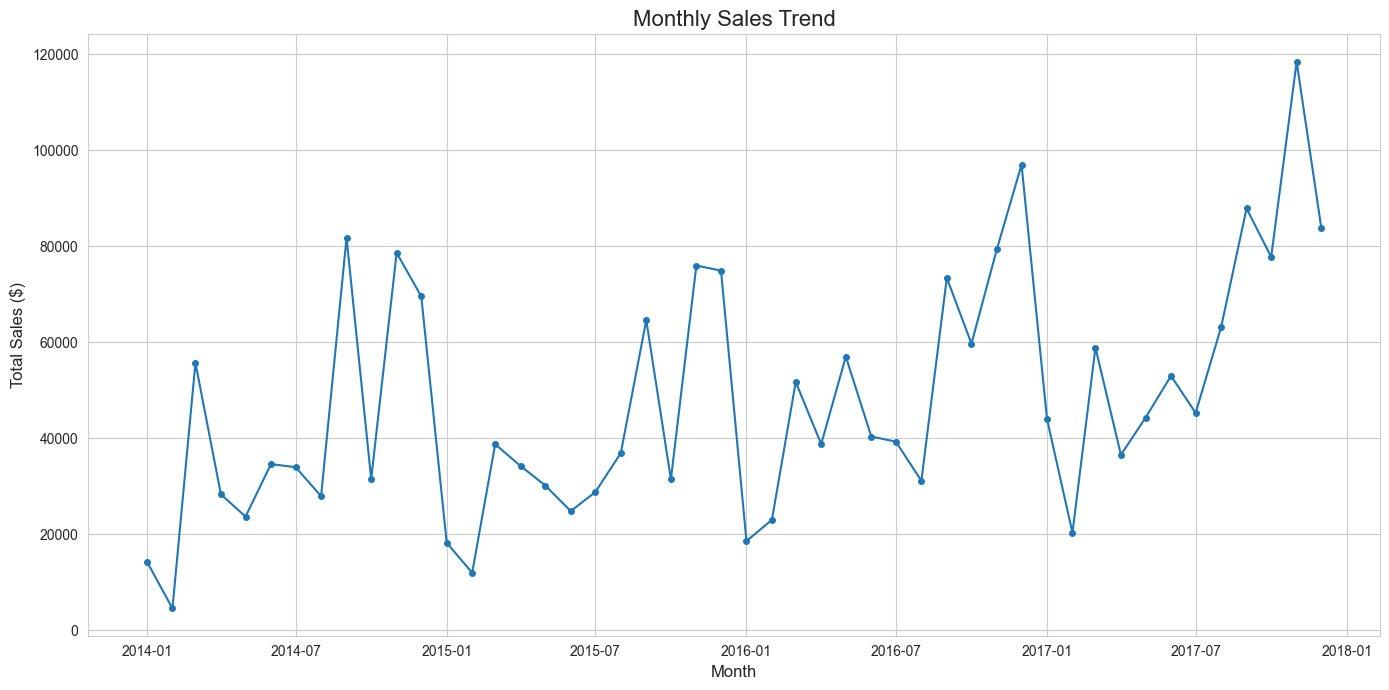

In [52]:
# --- View Line Chart - Sales by Months ---
plt.figure(figsize=(14, 7))
plt.plot(monthly_sales['Order Date'], monthly_sales['Sales'], marker='.', linestyle='-', markersize=8)
plt.title('Monthly Sales Trend', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig('monthly_sales_trend.png')
print("Generated monthly_sales_trend.png")

In [53]:
# --- Generate Dashboard ---
print("\n--- Generating Excel Dashboard ---")

try:
    with pd.ExcelWriter(output_file, engine='xlsxwriter', datetime_format='yyyy-mm-dd') as writer:
        workbook = writer.book

        dashboard_sheet = workbook.add_worksheet('Dashboard')

        header_format = workbook.add_format({'bold': True, 'font_size': 14, 'align': 'center', 'valign': 'vcenter'})
        dollar_format = workbook.add_format({'num_format': '$#,##0.00', 'font_size': 12})
        percent_format = workbook.add_format({'num_format': '0.0%', 'font_size': 12})
        title_format = workbook.add_format({'bold': True, 'font_size': 24, 'align': 'center', 'valign': 'vcenter'})
        
        print("Writing data sheets...")
        df.to_excel(writer, sheet_name='SourceData', index=False)
        autofit_columns(writer.sheets['SourceData'], df)

        region_sales.to_excel(writer, sheet_name='RegionData', index=False)
        region_sheet = writer.sheets['RegionData']
        autofit_columns(region_sheet, region_sales)
        region_sheet.hide()

        category_profit.to_excel(writer, sheet_name='CategoryData', index=False)
        category_sheet = writer.sheets['CategoryData']
        autofit_columns(category_sheet, category_profit)
        category_sheet.hide()

        monthly_sales.to_excel(writer, sheet_name='MonthlySalesData', index=False)
        monthly_sheet = writer.sheets['MonthlySalesData']
        autofit_columns(monthly_sheet, monthly_sales)
        monthly_sheet.hide()

        print("Building the dashboard layout...")
        dashboard_sheet.set_column('A:A', 2)
        dashboard_sheet.set_column('B:I', 15)
        dashboard_sheet.set_column('J:Q', 15)

        dashboard_sheet.merge_range('B2:Q3', 'Superstore Sales Performance Dashboard', title_format)

        dashboard_sheet.write('B5', 'Total Sales', header_format)
        dashboard_sheet.write('B6', total_sales, dollar_format)
        
        dashboard_sheet.write('E5', 'Total Profit', header_format)
        dashboard_sheet.write('E6', total_profit, dollar_format)
        
        dashboard_sheet.write('H5', 'Profit Margin', header_format)
        dashboard_sheet.write('H6', (overall_profit_margin / 100), percent_format) 
        
        dashboard_sheet.write('K5', 'Average Discount', header_format)
        dashboard_sheet.write('K6', average_discount_decimal, percent_format)

        print("Adding chart: Sales by Region")
        chart1 = workbook.add_chart({'type': 'bar'})
        chart1.add_series({
            'categories': f'=RegionData!$A$2:$A${len(region_sales) + 1}',
            'values':     f'=RegionData!$B$2:$B${len(region_sales) + 1}',
            'fill':       {'color': '#440154'},
        })
        chart1.set_title({'name': 'Total Sales by Region'})
        chart1.set_legend({'position': 'none'})
        dashboard_sheet.insert_chart('B8', chart1, {'x_scale': 1.8, 'y_scale': 1.2})

        print("Adding chart: Profit by Category")
        chart2 = workbook.add_chart({'type': 'bar'})
        chart2.add_series({
            'categories': f'=CategoryData!$A$2:$A${len(category_profit) + 1}',
            'values':     f'=CategoryData!$B$2:$B${len(category_profit) + 1}',
            'fill':       {'color': '#f89540'},
        })
        chart2.set_title({'name': 'Total Profit by Category'})
        chart2.set_legend({'position': 'none'})
        dashboard_sheet.insert_chart('J8', chart2, {'x_scale': 1.8, 'y_scale': 1.2})

        print("Adding chart: Profit vs. Discount")
        chart3 = workbook.add_chart({'type': 'scatter'})
        # Get column letters dynamically
        discount_col = df.columns.get_loc('Discount')
        profit_col = df.columns.get_loc('Profit')
        discount_col_letter = chr(ord('A') + discount_col)
        profit_col_letter = chr(ord('A') + profit_col)
        
        chart3.add_series({
            'categories': f'=SourceData!${discount_col_letter}$2:${discount_col_letter}${num_rows + 1}',
            'values':     f'=SourceData!${profit_col_letter}$2:${profit_col_letter}${num_rows + 1}',
            'marker':     {'type': 'automatic', 'size': 5},
            'line':       {'none': True},
        })
        chart3.set_title({'name': 'Profit vs. Discount'})
        chart3.set_x_axis({'name': 'Discount'})
        chart3.set_y_axis({'name': 'Profit'})
        chart3.set_legend({'position': 'none'})
        dashboard_sheet.insert_chart('B24', chart3, {'x_scale': 1.8, 'y_scale': 1.2})

        print("Adding chart: Monthly Sales Trend")
        chart4 = workbook.add_chart({'type': 'line'})
        chart4.add_series({
            'categories': f'=MonthlySalesData!$A$2:$A${len(monthly_sales) + 1}',
            'values':     f'=MonthlySalesData!$B$2:$B${len(monthly_sales) + 1}',
            'marker':     {'type': 'automatic', 'size': 5},
        })
        chart4.set_title({'name': 'Monthly Sales Trend'})
        chart4.set_x_axis({'name': 'Month', 'date_axis': True})
        chart4.set_y_axis({'name': 'Total Sales ($)'})
        chart4.set_legend({'position': 'none'})
        dashboard_sheet.insert_chart('J24', chart4, {'x_scale': 1.8, 'y_scale': 1.2})

    print(f"\n--- SUCCESS ---")
    print(f"Dashboard report automatically generated and saved as '{output_file}'")

except Exception as e:
    print(f"\n--- ERROR ---")
    print(f"An error occurred while generating the Excel dashboard: {e}")


--- Generating Excel Dashboard ---
Writing data sheets...
Building the dashboard layout...
Adding chart: Sales by Region
Adding chart: Profit by Category
Adding chart: Profit vs. Discount
Adding chart: Monthly Sales Trend

--- SUCCESS ---
Dashboard report automatically generated and saved as 'Superstore_Dashboard.xlsx'
